In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTANDO EXCEL

In [9]:
df = pd.read_excel('D:\\IRONHACK\\Eurovisión\\eurovision_song_contest_1975_2019.xlsx')
df.tail()

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate
49827,2019,f,2019f,J,Belarus,Greece,0,NaN
49828,2019,f,2019f,J,Belarus,Germany,8,NaN
49829,2019,f,2019f,J,Belarus,Belarus,0,x
49830,2019,f,2019f,J,Belarus,The Netherlands,0,NaN
49831,2019,f,2019f,J,Belarus,Russia,0,NaN


ARRUMANDO NOME DAS COLUNAS

In [10]:
df.columns = df.columns.str.lower()

In [11]:
df.columns = df.columns.str.replace(' ', '_')


In [12]:
df = df.rename(columns={'(semi-)_final': 'final', 'points______': 'points'})
df.head()

,year,final,edition,jury_or_televoting,from_country,to_country,points,duplicate
0,1975,f,1975f,J,Belgium,Belgium,0,x
1,1975,f,1975f,J,Belgium,Finland,0,NaN
2,1975,f,1975f,J,Belgium,France,2,NaN
3,1975,f,1975f,J,Belgium,Germany,0,NaN
4,1975,f,1975f,J,Belgium,Ireland,12,NaN


Tirando as filas que não são da final

In [13]:
df.shape

(49832, 8)

In [14]:
df.drop(df[df['final'] != 'f'].index, inplace = True)
df.shape

(34379, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34379 entries, 0 to 49831
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                34379 non-null  int64 
 1   final               34379 non-null  object
 2   edition             34379 non-null  object
 3   jury_or_televoting  34379 non-null  object
 4   from_country        34379 non-null  object
 5   to_country          34379 non-null  object
 6   points              34379 non-null  int64 
 7   duplicate           1004 non-null   object
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


Escolhendo as colunas com as que vou trabalhar

In [16]:
df = df[['year', 'final', 'jury_or_televoting', 'from_country', 'to_country', 'points']]
df.head()

,year,final,jury_or_televoting,from_country,to_country,points
0,1975,f,J,Belgium,Belgium,0
1,1975,f,J,Belgium,Finland,0
2,1975,f,J,Belgium,France,2
3,1975,f,J,Belgium,Germany,0
4,1975,f,J,Belgium,Ireland,12


Arrumando nome dos paises

In [17]:
sorted(df['from_country'].unique())

['Albania',
 'Andorra',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia & Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'F.Y.R. Macedonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Morocco',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Serbia & Montenegro',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'The Netherands',
 'The Netherlands',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'Yugoslavia']

In [18]:
df['from_country'] = df['from_country'].str.replace('The Netherands', 'Netherlands')
df['from_country'] = df['from_country'].str.replace('The Netherlands', 'Netherlands')
df['from_country'] = df['from_country'].str.replace('North Macedonia', 'F.Y.R. Macedonia')

In [19]:
sorted(df['from_country'].unique())

['Albania',
 'Andorra',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia & Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'F.Y.R. Macedonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Serbia & Montenegro',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'Yugoslavia']

In [20]:
df = df[df['from_country'] != 'Andorra']

In [21]:
sorted(df['to_country'].unique())

['Albania',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia & Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'F.Y.R. Macedonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Morocco',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Serbia & Montenegro',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'The Netherlands',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'Yugoslavia']

In [22]:
df['to_country'] = df['to_country'].str.replace('North Macedonia', 'F.Y.R. Macedonia')
df['to_country'] = df['to_country'].str.replace('The Netherlands', 'Netherlands')

In [23]:
sorted(df['to_country'].unique())

['Albania',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia & Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'F.Y.R. Macedonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Serbia & Montenegro',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'Yugoslavia']

In [24]:
df['from_country'].nunique()

51

In [25]:
df['to_country'].nunique()

51

Escolhendo os anos de análisis. Analizaremos a partir de 1.995, ficando assim os últimos 25 anos, e já após a guerra na Yugoslavia.

In [26]:
df.shape

(34233, 6)

In [27]:
df = df[df['year'] > 1994]
df.shape

(25700, 6)

In [28]:
df.head()

,year,final,jury_or_televoting,from_country,to_country,points
8533,1995,f,J,Austria,Austria,0
8534,1995,f,J,Austria,Belgium,1
8535,1995,f,J,Austria,Bosnia & Herzegovina,0
8536,1995,f,J,Austria,Croatia,0
8537,1995,f,J,Austria,Cyprus,0


In [29]:
sorted(df['year'].unique())

[1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

Separando voto do jurado do televoto

In [30]:
df['jury_or_televoting'].value_counts()

J    21382
T     4318
Name: jury_or_televoting, dtype: int64

In [31]:
df_jury = df[df['jury_or_televoting'] == 'J']
df_jury.shape

(21382, 6)

In [32]:
df_jury = df.rename(columns={'jury_or_televoting': 'jury'})
df_jury.head(2)

,year,final,jury,from_country,to_country,points
8533,1995,f,J,Austria,Austria,0
8534,1995,f,J,Austria,Belgium,1


In [33]:
df_tele = df[df['jury_or_televoting'] == 'T']
df_tele.shape

(4318, 6)

In [34]:
df_tele = df_tele.rename(columns={'jury_or_televoting': 'tele'})
df_tele.head(2)

,year,final,tele,from_country,to_country,points
36352,2016,f,T,Albania,Armenia,2
36353,2016,f,T,Albania,Australia,12


In [35]:
sorted(df_jury['from_country'].unique())

['Albania',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia & Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'F.Y.R. Macedonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Latvia',
 'Lithuania',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Serbia & Montenegro',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'Ukraine',
 'United Kingdom']

ANALIZANDO OS VOTOS DO JURADO

In [36]:
df_jury.head()

,year,final,jury,from_country,to_country,points
8533,1995,f,J,Austria,Austria,0
8534,1995,f,J,Austria,Belgium,1
8535,1995,f,J,Austria,Bosnia & Herzegovina,0
8536,1995,f,J,Austria,Croatia,0
8537,1995,f,J,Austria,Cyprus,0


In [37]:
grouped = df_jury.groupby(['from_country', 'to_country'])['points'].sum()

In [39]:
df.to_csv(r'D:\\IRONHACK\\Eurovisión\\CSV_PRONTOS\\votos_eurovision.csv')

In [38]:
for country in df_jury['from_country'].unique():
    top_countries = grouped.loc[country].nlargest(5)
    print(f"Os 10 países que {country} mais vota, são:")
    print(top_countries)
    print()

Os 10 países que Austria mais vota, são:
to_country
Sweden                  91
Germany                 82
Bosnia & Herzegovina    74
Netherlands             68
Italy                   66
Name: points, dtype: int64

Os 10 países que Belgium mais vota, são:
to_country
Netherlands    131
Sweden          98
Turkey          97
France          95
Greece          80
Name: points, dtype: int64

Os 10 países que Bosnia & Herzegovina mais vota, são:
to_country
Croatia     115
Turkey       93
Serbia       76
Slovenia     60
France       57
Name: points, dtype: int64

Os 10 países que Croatia mais vota, são:
to_country
Bosnia & Herzegovina    140
Serbia                   88
Slovenia                 81
F.Y.R. Macedonia         74
Russia                   74
Name: points, dtype: int64

Os 10 países que Cyprus mais vota, são:
to_country
Greece    246
Russia    117
Italy      79
Sweden     78
Spain      77
Name: points, dtype: int64

Os 10 países que Denmark mais vota, são:
to_country
Sweden         2

In [50]:
for country in df_tele['from_country'].unique():
    top_countries = grouped.loc[country].nlargest(5)
    print(f"Os 10 países que {country} mais vota, são:")
    print(top_countries)
    print()

Os 10 países que Albania mais vota, são:
to_country
Italy     132
Greece    129
Turkey     71
Spain      55
Sweden     52
Name: points, dtype: int64

Os 10 países que Armenia mais vota, são:
to_country
Russia     126
Georgia     75
Greece      75
France      73
Ukraine     70
Name: points, dtype: int64

Os 10 países que Australia mais vota, são:
to_country
Sweden      56
Belgium     34
Bulgaria    31
Israel      30
Moldova     29
Name: points, dtype: int64

Os 10 países que Austria mais vota, são:
to_country
Sweden                  91
Germany                 82
Bosnia & Herzegovina    74
Netherlands             68
Italy                   66
Name: points, dtype: int64

Os 10 países que Azerbaijan mais vota, são:
to_country
Ukraine    108
Russia     103
Moldova     52
Turkey      48
Israel      46
Name: points, dtype: int64

Os 10 países que Belarus mais vota, são:
to_country
Russia        153
Ukraine       126
Norway         73
Azerbaijan     66
Armenia        52
Name: points, dtype: in

In [40]:

# Agrupamos por from_country y to_country y sumamos los puntos
votos = df.groupby(['from_country', 'to_country'])['points'].sum().reset_index()

<AxesSubplot:xlabel='to_country', ylabel='from_country'>

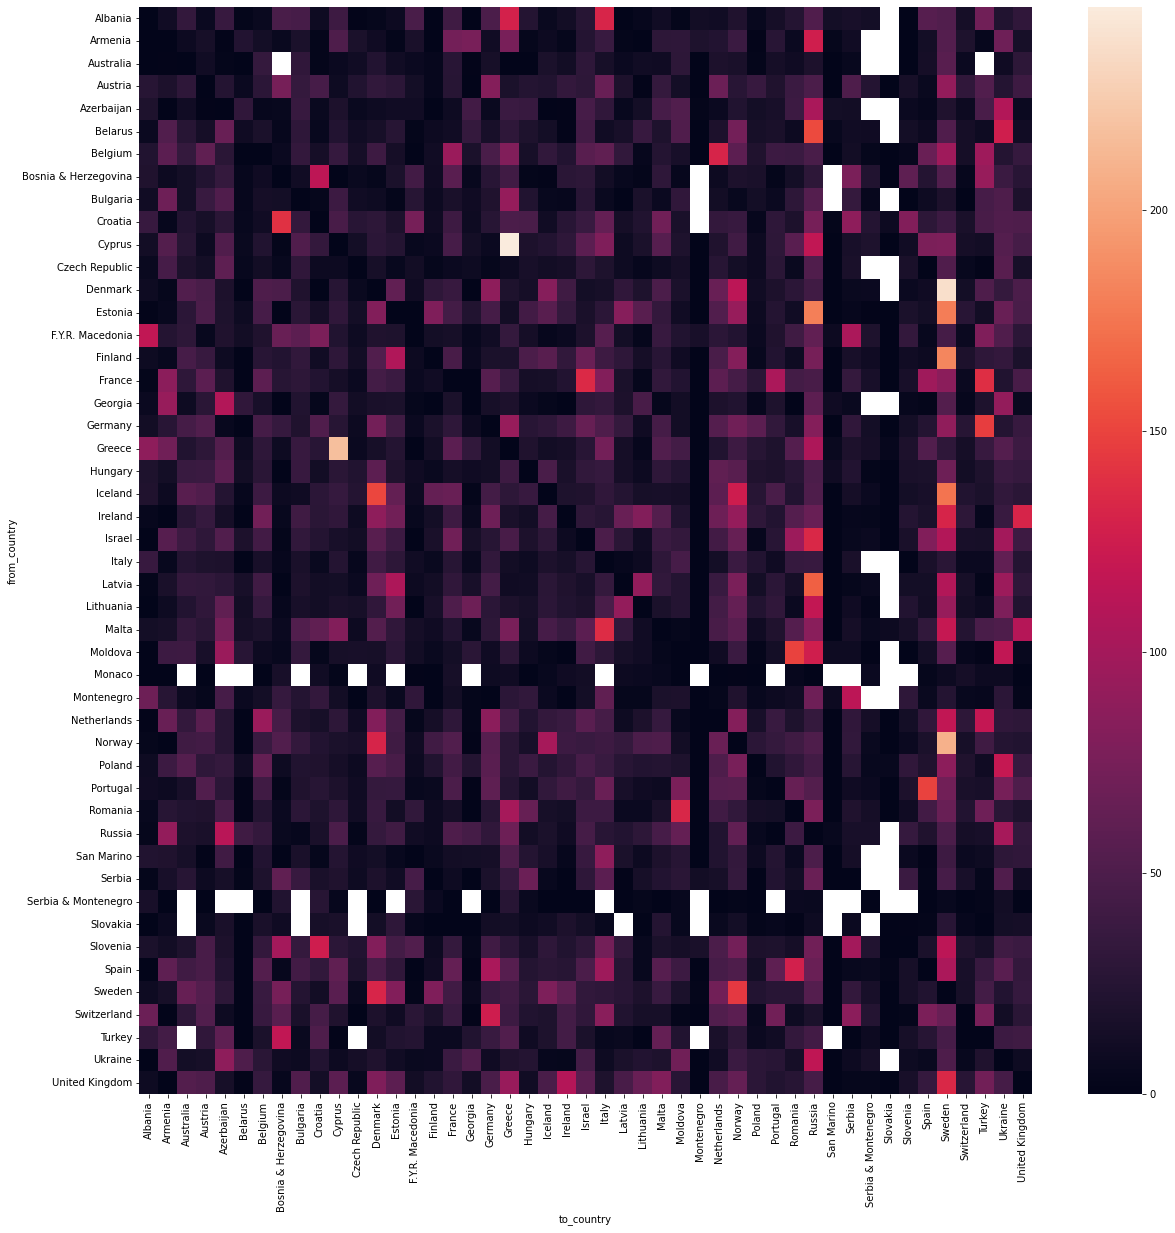

In [41]:
plt.figure(figsize=(20, 20))
sns.heatmap(votos.pivot(index='from_country', columns='to_country', values='points'))

In [42]:
df_tele.head()

,year,final,tele,from_country,to_country,points
36352,2016,f,T,Albania,Armenia,2
36353,2016,f,T,Albania,Australia,12
36354,2016,f,T,Albania,Austria,0
36355,2016,f,T,Albania,Azerbaijan,0
36356,2016,f,T,Albania,Belgium,0


In [43]:
points_tele =  df_tele.groupby(['year', 'to_country'])[['from_country', 'points']].sum().reset_index()

In [44]:
points_tele.head()

,year,to_country,points
0,2016,Armenia,134
1,2016,Australia,191
2,2016,Austria,120
3,2016,Azerbaijan,73
4,2016,Belgium,51


In [45]:
points_tele['points'].values

array([134, 191, 120,  73,  51, 180,  33,  53,   0, 109,  24,  10,  56,
        11,  34,  63,  96,  16,  39, 222, 361,  80,  10, 139, 323,   8,
        21,   2,   0,  42,  33, 255, 337, 103,  32,   8,  90,   3,  29,
       152,   5, 208, 264,  15,  29,  41, 376, 224,   5, 126,  24,  12,
        58,   9,  71,  66, 253, 215, 188, 102,  23,  59, 136,  65,  62,
       317, 249,  91, 115,  32,  84,  18,  75,  23,  18,  21, 119,  25,
        46, 128,  94,  23,  31,   6,  48,  45,  57,  35,   0,  24, 183,
        34, 251,  20, 262, 289, 230,  63,  54,  58,  52,  92, 210,   3],
      dtype=int64)

In [46]:
points_tele = points_tele.rename(columns={'points': 't_points'})

In [47]:
points_tele.head()

,year,to_country,t_points
0,2016,Armenia,134
1,2016,Australia,191
2,2016,Austria,120
3,2016,Azerbaijan,73
4,2016,Belgium,51


In [48]:
points_tele.to_csv(r'D:\\IRONHACK\\Eurovisión\\CSV_PRONTOS\\votos_tele.csv')

In [49]:
portugal_data = points_tele[points_tele['to_country'] == 'Portugal']
print(portugal_data)

    year to_country  t_points
46  2017   Portugal       376
71  2018   Portugal        18
